In [2]:
'''
Convolution + Pooling -> sub sampling
'''
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist/", one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


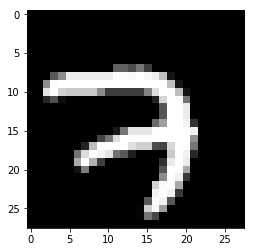

In [16]:
img = mnist.train.images[0].reshape(28,28) # 3

plt.imshow(img, cmap='gray')
plt.show()

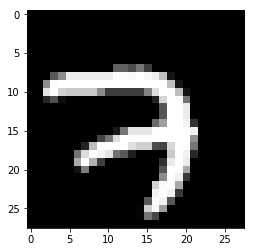

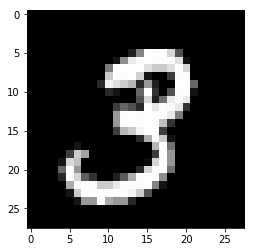

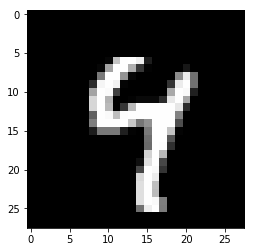

In [3]:
img = mnist.train.images[0:3].reshape(3, 28,28) # 3

for i in range(img.shape[0]):
    
    plt.imshow(img[i], cmap='gray')
    plt.show()

In [11]:

sess = tf.InteractiveSession()

# X(input image)
img = img.reshape(-1,28,28,1) 
img.shape

(1, 28, 28, 1)

In [12]:

# Filter(Weight)
Filter = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01)) # h, w, c, filter

# 합성곱 함수 
conv2d = tf.nn.conv2d(img, Filter, strides=[1,2,2,1], padding='SAME')
print(conv2d)

Tensor("Conv2D_1:0", shape=(1, 14, 14, 5), dtype=float32)


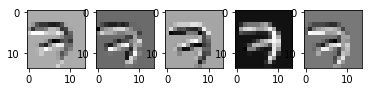

In [13]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)   # (1, 14, 14, 5) ->  (5, 14, 14, 1)

for i, one_img in enumerate(conv2d_img) : 
    # 1행5열 : 5개 이미지 
    plt.subplot(1,5,i+1)
    plt.imshow(one_img.reshape(14,14), cmap='gray')    
plt.show()    

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


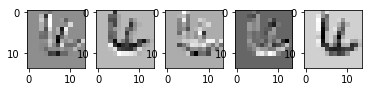

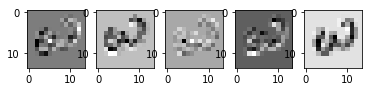

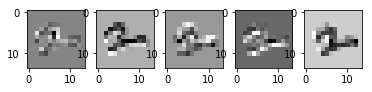

In [7]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval() # (3, 14, 14, 5)

for img_num, dim in enumerate(conv2d_img) : 
    # 1행5열 : 5개 이미지 
    temp = np.swapaxes(dim, 0, 2)
    for filter_, img_ in enumerate(temp):
        plt.subplot(1,5,filter_+1)
        plt.imshow(img_.reshape(14,14), cmap='gray')    
    plt.show()    

In [14]:

# Max Pooling
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(pool)

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


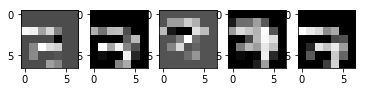

In [15]:
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)

for i, one_img in enumerate(pool_img) :
    # 1행5열 : 5개 이미지 
    plt.subplot(1,5, i+1)
    plt.imshow(one_img.reshape(7,7), cmap='gray')
plt.show()